# Advanced Gargantext Tutorial (Python)

In [1]:
import sys
sys.path.insert(0, '/srv/gargantext')

In [2]:
# First import the library Gargantext Notebook
from gargantext_notebook import *

# This enables to draw graphics later
%matplotlib inline  

# Philomemies

## Instantiate the corpus you are working on

In [3]:
corpus_url = "http://localhost:8000/projects/302694/corpora/302695/"
corpus_id = corpus_url.split("/")[6]
print("My corpus id is : %s." % corpus_id)

My corpus id is : 302695.


## Getting the Map Terms 

In [4]:
from gargantext.models import *
import csv

map_id = session.query(MaplistNode.id).filter(MaplistNode.parent_id == corpus_id).first()

mapTerms = (session.query(Ngram).join( NodeNgram, NodeNgram.ngram_id == Ngram.id)
                                .filter(NodeNgram.node_id == map_id)
                                .all()
           )

print([(m.id, m.terms) for m in mapTerms[:10]])

[(21, 'environment'), (42, 'development'), (184, 'examples'), (196, 'water'), (368, 'problem'), (576, 'work'), (654, 'technology'), (712, 'number'), (738, 'operation'), (817, 'experiments')]


## Save in CSV File

In [5]:
toPrint = [(m.id,m.terms) for m in mapTerms]
csvfile = "./MapTerms.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in toPrint:
        writer.writerow([val])

In [6]:
# Next:
# You can have access to your CSV file in the home of you Notebook!
# Click, rename, mv, delete in your Notebook

#Assuming output is a list of lists
#with open(csvfile, "w") as output:
#    writer = csv.writer(output, lineterminator='\n')
#    writer.writerows(res)

## Occurrences of MapTerms by Year

In [6]:
from gargantext.util.toolchain.metric_tfidf import compute_occs

corpus= session.query(CorpusNode).get(corpus_id)

In [7]:
# To get all the documents:
docs = documents(corpus_id)
docs[0].hyperdata

{'abstract': 'The purpose of this paper is to develop a new fuzzy dynamic programming approach for solving hybrid multiobjective multistage decision-making problems. We first present a methodology of fuzzy evaluation and fuzzy optimization for hybrid multiobjective systems, in which the qualitative and quantitative objectives are synthetically considered. The qualitative objectives are evaluated by decision-makers with linguistic variables and the quantitative objectives are converted into proper dimensionless indices. After getting the marginal evaluations for each objective, a new aggregation method based on the principle of fuzzy pattern recognition is developed to get a global evaluation for all objectives. With the global evaluation obtained, a fuzzy optimization process is performed. Then we present a dynamic optimization algorithm by incorporating the fuzzy optimization process with the conventional dynamic programming technique to solve hybrid multiobjective multistage decision

In [8]:
pubsByYear = countByField(docs, "publication_year")

print(pubsByYear)

[(1954, 2), (1956, 1), (1957, 1), (1958, 5), (1960, 3), (1961, 5), (1962, 2), (1963, 11), (1964, 5), (1965, 3), (1966, 1), (1967, 8), (1968, 17), (1969, 10), (1970, 8), (1971, 20), (1972, 12), (1973, 20), (1974, 16), (1975, 17), (1976, 8), (1977, 10), (1978, 14), (1979, 16), (1980, 28), (1981, 12), (1982, 14), (1983, 15), (1984, 19), (1985, 22), (1986, 27), (1987, 28), (1988, 24), (1989, 20), (1990, 26), (1991, 54), (1992, 48), (1993, 40), (1994, 40), (1995, 28), (1996, 32), (1997, 34), (1998, 30), (1999, 25), (2000, 37), (2001, 29), (2002, 13), (2003, 19), (2004, 17), (2005, 21), (2006, 17), (2007, 11), (2008, 10), (2009, 8), (2010, 9), (2011, 9), (2012, 12), (2013, 7)]


In [14]:
years = [y for y in map(lambda x: x[0], pubsByYear)]
print(years)

[1954, 1956, 1957, 1958, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [ ]:
# To Add the groups you need to get the Node
group_id = session.query(GrouplistNode.id).filter(GrouplistNode.parent_id == corpus_id).first()

occByYear = list()

# Not optmized yet since sql request is launched for each year
# We will use a group by if needed, depends on the size of corpus
# Clarity of the computation is first done here
# Optmization will be the step After
for year in years:
    listNgramOcc = compute_occs(corpus, groupings_id=group_id, year=year, interactiv=True)
    listYearNgramOcc = [(year, ngram_id, occ) for (ngram_id, occ) in listNgramOcc]
    occByYear.append(listYearNgramOcc)
    

In [19]:

# Saving the results in file
toPrint = [(m.id,m.terms) for m in mapTerms]
csvfile = "./MapTerms.csv"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in toPrint:
        writer.writerow([val])

[[(1954, 5249, 1.0), (1954, 5366, 1.0), (1954, 7019, 1.0), (1954, 10524, 1.0), (1954, 121362, 1.0), (1954, 505775, 1.0)], [(1956, 7019, 1.0), (1956, 8604, 1.0), (1956, 755610, 1.0), (1956, 2361839, 1.0)]]


In [50]:
mapTermsOcc = (session.query(Occurrences).join( MapTerms, MapTerms.ngram_id == Occurrences.ngram_id)
                                         .filter(MapTerms.node_id == map_id)
                                         
                                         .join(Documents, Documents.id == Occurrences.node2_id)
                                         .filter(Documents.parent_id == corpus_id)
                                         
                                         .filter(Occurrences.node1_id == occ_id)
                                   
                                         #.group_by(Occurrences.ngram_id)
                                         .all()
              )

In [51]:
group_id

(303698)

In [52]:
mapTermsOcc

[]

## Cooccurrences of MapTerms by Year

In [44]:
from graph.cooccurrences import countCooccurrences

In [ ]:
        (cooc_id, cooc_matrix) = countCooccurrences( corpus_id=corpus_id, cooc_id=                                        
                                    , field1=field1, field2=field2                                                               
                                    , start=start           , end =end                                                           
                                    , mapList_id=mapList_id , groupList_id=groupList_id                                          
                                    , isMonopartite=True    , threshold = threshold                                              
                                    , distance=distance     , bridgeness=bridgeness                                              
                                    , save_on_db = True     , reset = reset                                                      
                                    )                                               

In [45]:
#countCooccurrences(corpus_id, save_on_db=False, start="2000-01-01", end="2017-12-31")
(cooc_id, cooc_matrix) = countCooccurrences( corpus_id = corpus_id
                                           , cooc_id   = None
                                           , field1="ngrams", field2 = "ngrams"
                                           
                                           , mapList_id   = map_id
                                           , groupList_id = group_id
                                            
                                           , isMonopartite =True    , threshold = 2                                              
                                           #, distance      =Non     , bridgeness=bridgeness
                                            
                                           , save_on_db   = True
                                           , reset        = True
                                           )

GRAPH #303869 Filtering the matrix with Map and Group Lists.
WeightedMatrix bulk_insert start
WeightedMatrix bulk_insert stop
GRAPH #303869 ... Node Cooccurrence Matrix saved
GRAPH #303869 ... Parameters saved in Node.


In [46]:
cooc_matrix.items

defaultdict(float, {})

## Number of Documents per year

In [32]:
# To get all the documents:
docs = documents(corpus_id)
# If I want to count:
myChart = chart(docs, "publication_year")
print(myChart[:10])

      Date  DateValue
Date                 
1954  1954          2
1956  1956          1
1957  1957          1
1958  1958          5
1960  1960          3
1961  1961          5
1962  1962          2
1963  1963         11
1964  1964          5
1965  1965          3


# Others example

In [3]:
#project = myProject_fromUrl("http://imt.gargantext.org/projects/300535")
project = myProject_fromUrl("http://localhost:8000/projects/301096")
corpus  = newCorpus(project, source="hal", name="Machine learning", query="LSTM")

139
LSTM 1000
CORPUS #303703
PARSING
Loading available PARSERS:
	- EuropresseParser
	- RISParser
	- PubmedParser
	- RISParser
	- ISIParser
	- RISParser
	- CSVParser
	- ISTexParser
	- CernParser
	- MultivacParser
	- HalParser
	- IsidoreParser
0 docs skipped
139 parsed
#MAIN language of the CORPUS __unknown__
CORPUS #303703: parsed 139
#TAGGERS LOADED:  {'__unknown__': <gargantext.util.taggers.NltkTagger.NltkTagger object at 0x7f03064496a0>}
#SUPPORTED TAGGER LANGS ['__unknown__']
INTEGRATE
INTEGRATE
INTEGRATE
CORPUS #303703: extracted ngrams
CORPUS #303703: indexed hyperdata
CORPUS #303703: [2017-10-10_09:34:23] new favorites node #303843
CORPUS #303703: [2017-10-10_09:34:23] starting ngram lists computation
CORPUS #303703: [2017-10-10_09:34:24] new stoplist node #303844
# STEMMERS LOADED {'__unknown__': <nltk.stem.snowball.SnowballStemmer object at 0x7f0306497cf8>}
#SUPPORTED STEMMERS LANGS []
CORPUS #303703: [2017-10-10_09:34:25] new grouplist node #303845
CORPUS #303703: [2017-10-10_

In [4]:
# search full text (english by default) in the corpus
scan_gargantext(corpus.id, "machine | learning & deep")

6

In [7]:
# search full text (english by default) in the corpus
scan_gargantext(corpus.id, "machine | learning & deep")

0

In [6]:
# search full text (english by default) and DELETE in the corpus
scan_gargantext_and_delete(corpus.id, "machine | learning & deep")

6

In [ ]:
for doc in new_docs:
    new_doc = (Node( user_id   = project.user_id
                   , parent_id = corpus.id
                   , typename= 'DOCUMENT'
                   , name=doc["title"][:50]
                   , hyperdata=doc)
              )
    session.add(new_doc)
session.commit()

In [4]:
# Copier/coller l'url du corpus (avec http://): sur lequel travailler
corpus_url = "http://gargantext.org/projects/251737/corpora/254749"

corpus_id = corpus_url.split("/")[6]

print("L\'identifiant du corpus est : %s" % corpus_id)

L'identifiant du corpus est : 254749


In [5]:
# To get all the documents:
docs = documents(corpus_id)

In [6]:
# To get the title of the first document 
# [0] indicates the index of the first document
docs[0].hyperdata['title']

'Towards big data science in the decade ahead from ten years of InCoB and the 1st ISCB-Asia Joint Conference.'

In [7]:
# To get the abstract of the first document (0)
docs[0].hyperdata['abstract']

"The 2011 International Conference on Bioinformatics (InCoB) conference, which is the annual scientific conference of the Asia-Pacific Bioinformatics Network (APBioNet), is hosted by Kuala Lumpur, Malaysia, is co-organized with the first ISCB-Asia conference of the International Society for Computational Biology (ISCB). InCoB and the sequencing of the human genome are both celebrating their tenth anniversaries and InCoB's goalposts for the next decade, implementing standards in bioinformatics and globally distributed computational networks, will be discussed and adopted at this conference. Of the 49 manuscripts (selected from 104 submissions) accepted to BMC Genomics and BMC Bioinformatics conference supplements, 24 are featured in this issue, covering software tools, genome/proteome analysis, systems biology (networks, pathways, bioimaging) and drug discovery and design."

In [8]:
# To get the authors of the first document (0)
docs[0].hyperdata['authors']

'Shoba Ranganathan, Christian Schönbach, Janet Kelso, Burkhard Rost, Sheila Nathan, Tin Wee Tan'

In [9]:
# To get the source of the first document (0)
docs[0].hyperdata['source']

'BMC bioinformatics'

In [10]:
# If I want to count:
myChart = chart(docs, "publication_year")

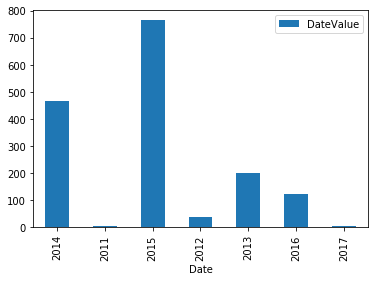

In [11]:
myChart.plot.bar()

## Title

Here I can add some comments on the cart.
1. First point
2. Second point

# Lang Cleaning tools

In [ ]:
detect_lang("Ceci est une phrase en français.")

In [ ]:
detect_lang("This is an english sentence.")

In [ ]:
chart(docs, "language_iso2").plot.bar()

In [14]:
Counter([doc.hyperdata["language_iso2"] for doc in docs])

Counter({'de': 13,
         'en': 1547,
         'es': 5,
         'fi': 1,
         'fr': 4,
         'hu': 1,
         'it': 1,
         'ja': 5,
         'ko': 1,
         'ru': 3,
         'zh': 23})

In [12]:
# Deleting language that is not in majority
def cleanCorpusWithLang(corpus_id, lang):
    return (session.query(Node.id).filter(Node.parent_id == corpus_id)
                        .filter(Node.hyperdata["language_iso2"].astext != lang)
                        .count()
                       #.delete()
           )

In [13]:
cleanCorpusWithLang(corpus_id, 'en')

57

In [15]:
abstract0 = """"Ceci est un paragraphe en français.

This is an english paragraph.
 """

abstract1 = """"This is an english paragraph.

This is an english paragraph.
 """

def clean_lang_inText(lang, text):
    
    texts_before = nltk.tokenize.blankline_tokenize(text)
    texts_after  = '\n\n'.join([sentence 
                                    for sentence in texts_before
                                    if detect_lang(sentence) == lang
                              ])
    
    return (len(texts_before) != len(nltk.tokenize.blankline_tokenize(texts_after)), texts_after)

[clean_lang_inText('en', abstract) for abstract in [abstract0, abstract1]]

# TODO update each document accordingly

[(True, 'This is an english paragraph.\n '),
 (False, '"This is an english paragraph.\n\nThis is an english paragraph.\n ')]

In [ ]:
# TODO update all the abstract with That function

# Measures IMT Tools

In [16]:
scan_hal("machine learning AND deep")

ConnectionError: HTTPSConnectionPool(host='api.archives-ouvertes.fr', port=443): Max retries exceeded with url: /search?wt=json&q=machine+learning+AND+deep&fl=+title_s%0A+++++++++++++++%2C+abstract_s%0A+++++++++++++++%2C+submittedDate_s%0A+++++++++++++++%2C+journalDate_s%0A+++++++++++++++%2C+authFullName_s%0A+++++++++++++++%2C+uri_s%0A+++++++++++++++%2C+isbn_s%0A+++++++++++++++%2C+issue_s%0A+++++++++++++++%2C+docType_s%0A+++++++++++++++%2C+journalPublisher_s%0A+++++++++++++&start=1&rows=10 (Caused by NewConnectionError('<requests.packages.urllib3.connection.VerifiedHTTPSConnection object at 0x7f48069d1f98>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution',))

In [ ]:
# Request syntax
# "network analysis"     = network <-> analysis
# "network OR analysis"  = network | analysis
# "network AND analysis" = network & analysis

scan_gargantext(corpus_id, 'english', "machine | learning & deep")

# "network NOT analysis" = @@ to_tsquery('network') !! to_tsquery('analysis')
# (need to change the function if not has to be used)

In [ ]:
# Forces / Faiblesses de l'IMT
#             Hal Query                     Gargantext Query
queries = [ ("network analysis"         , "network <-> analysis" )
          , ("big data AND something"   , "(big <-> data) & something")
           ]
[(query[0], query[1]) for query in queries]

In [ ]:
def imt_vs_hal(corpus_id, queryHal, queryGarg):
    return((scan_gargantext(corpus_id, 'english', queryGarg),        scan_hal(queryHal)))
    #return((scan_gargantext(corpus_id, 'english', queryGarg) *100 / scan_hal(queryHal)))

In [ ]:
# Then chart it to see your strenght and weakness!
[imt_vs_hal(corpus_id, query[0], query[1]) for query in queries]


# Graph generation

In [ ]:
# TODO Cooccurrences optimization

In [ ]:
# TODO optimize the distributional distance

# List Management

In [ ]:
# Front End add a check box to merge or to overwrite previous list

In [ ]:
# optimize the list merge